<a href="https://colab.research.google.com/github/AlanFirmino2024/Introducao_a_ciencia_de_dados/blob/main/05_logistic_regression_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importando bibliotecas

In [96]:
# Regressão Logística e Métricas de Avaliação de Classificação Binária

## 1. Introdução

#Este notebook apresenta os conceitos de regressão logística e as principais métricas
#de avaliação de algoritmos de classificação binária. Vamos criar um conjunto de dados sintético,
#treinar um modelo de regressão logística e avaliar seu desempenho usando a matriz de confusão e a curva ROC.

## 2. Criação do Conjunto de Dados Sintético

#Importa a biblioteca Numpy
import numpy as np
#Importa a biblioteca pandas
import pandas as pd
#Importa a função make_classification da biblioteca Scikit-learn, usada para
#gerar conjuntos de dados sintéticos.
from sklearn.datasets import make_classification
#Importa a biblioteca Matplotlib, usada para criar visualizações gráficas.
import matplotlib.pyplot as plt
#Importa a função train_test_split que divide o data set em treino e teste.
from sklearn.model_selection import train_test_split
#Importa a classe LogisticRegression, que é usada para criar e treinar modelos de regressão logística.
from sklearn.linear_model import LogisticRegression
#Importa a função confusion_matrix que é usada para calcular a matriz de confusão.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Importa as funções roc_curve que são usadas para calcular e avaliar a curva ROC e a AUC.
from sklearn.metrics import roc_curve, roc_auc_score


## 3. Criando conjunto de dados sintéticos

A função "***make_classification***" cria um conjunto de dados sintético para um problema de classificação binária, onde X contém as características (features) e y os rótulos (targets). Nesse caso geramos 1000 amostras, onde cada amostra possui 2 características que são informativas e não redundantes. Foi adicionado um ruído de 10% nos rótulos, fazendo com que eles sejam aleatoriamente alterados.

In [97]:
#Cria um conjunto de dados sintético
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, random_state=42)

#Converte X em um DataFrame, com colunas nomeadas como 'Feature_1' e 'Feature_2'.
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
#Adiciona a coluna 'Target' ao DataFrame df, contendo os rótulos y.
df['Target'] = y

#Exibe as primeiras 5 linhas do DataFrame df.
df.head()


,Feature_1,Feature_2,Target
0,0.458509,-1.004388,0
1,0.368559,-1.355987,0
2,1.280085,0.984538,1
3,0.620084,-1.036818,0
4,0.784142,-0.881998,0


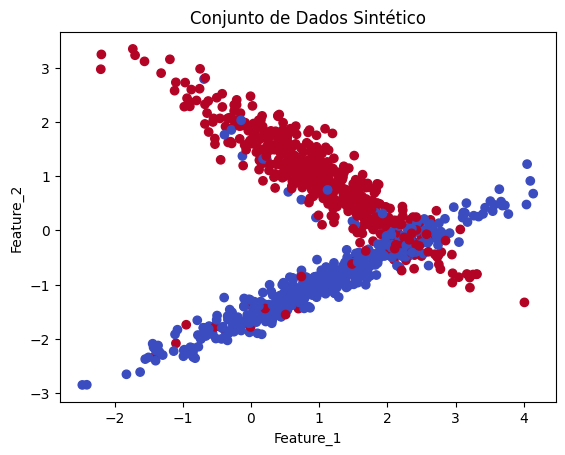

In [98]:
# Visualização dos dados

#Cria um gráfico de dispersão das duas características (Feature_1 e Feature_2),
#onde c=df['Target']: Define a cor dos pontos com base nos rótulos da coluna 'Target'
#e cmap='coolwarm': Utiliza o mapa de cores 'coolwarm' para distinguir as classes.
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Target'], cmap='coolwarm')
#Define o rótulo do eixo x como 'Feature_1'.
plt.xlabel('Feature_1')
#Define o rótulo do eixo y como 'Feature_2'.
plt.ylabel('Feature_2')
#Adiciona o título 'Conjunto de Dados Sintético' ao gráfico.
plt.title('Conjunto de Dados Sintético')
#Exibe o gráfico gerado.
plt.show()

In [99]:
#Divide o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Verifica as dimensões dos dados de teste e treino.
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (800, 2)
Tamanho do conjunto de teste: (200, 2)


## 3. Modelo de regressão logística

In [100]:
#Cria um modelo de regressão logística.
model = LogisticRegression()
#Treina o modelo utilizando os dados de treino.
model.fit(X_train, y_train)

#Verifica e exibe os coeficientes do modelo
print("Coeficientes do modelo:", model.coef_)
#Verifica e exibe o intercepto do modelo que é a parte do modelo de regressão
#que não depende das características.
print("Intercepto do modelo:", model.intercept_)


#Faz previsões no conjunto de teste
y_pred = model.predict(X_test)


Coeficientes do modelo: [[-0.34058049  2.14161132]]
Intercepto do modelo: [0.6344391]


## 4. Matriz de confusão

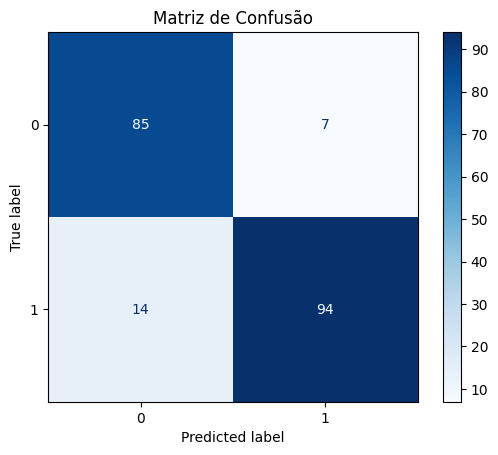

In [101]:
#Calcula a matriz de confusão comparando os rótulos reais (y_test) com os rótulos previstos pelo modelo (y_pred).
cm = confusion_matrix(y_test, y_pred)
#Cria um objeto para facilitar a visualização da matriz de confusão.
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#Plota a matriz de confusão utilizando um mapa de cores chamado 'Blues'.
disp.plot(cmap='Blues')
#Define o título do gráfico como "Matriz de Confusão".
plt.title('Matriz de Confusão')
#Exibe o gráfico com a matriz de confusão.
plt.show()


## 5. Curva ROC

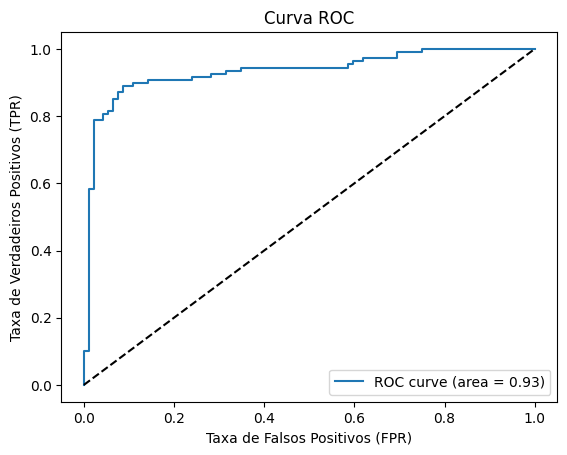

In [102]:
# Calcula as previsões de probabilidade no conjunto de teste.
y_prob = model.predict_proba(X_test)[:, 1]

# Calcula os pontos necessários para traçar a curva ROC.
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#Calcula a AUC (Área Sob a Curva) da curva ROC. Quanto mais proximo de 1, melhor.
roc_auc = roc_auc_score(y_test, y_prob)

# Plotando a curva ROC

#Plota a curva ROC usando os valores de FPR e TPR calculados. A legenda no gráfico exibe a AUC calculada.
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
#Plota a linha diagonal que representa uma classificação aleatória.
plt.plot([0, 1], [0, 1], 'k--')
#Define o rótulo do eixo x como 'Taxa de Falsos Positivos (FPR)'.
plt.xlabel('Taxa de Falsos Positivos (FPR)')
#Define o rótulo do eixo y como 'Taxa de Verdadeiros Positivos (TPR)'.
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
#Define o título do gráfico como 'Curva ROC'.
plt.title('Curva ROC')
#Ativa a legenda no gráfico.
plt.legend(loc='lower right')
#Exibe o gráfico com a curva ROC.
plt.show()
